In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge # 릿지회귀
import pandas as pd

In [0]:
boston=load_boston()

In [7]:
df_boston=pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
df_boston.loc[:,'CRIM':'RM']

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
5,0.02985,0.0,2.18,0.0,0.458,6.430
6,0.08829,12.5,7.87,0.0,0.524,6.012
7,0.14455,12.5,7.87,0.0,0.524,6.172
8,0.21124,12.5,7.87,0.0,0.524,5.631
9,0.17004,12.5,7.87,0.0,0.524,6.004


In [0]:
X= df_boston.loc[ : , 'CRIM':'LSTAT']
y= boston.target

In [27]:
print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X) # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 featur
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [29]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state= 42)
lr= LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수: {:.2f}". format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수: {:.2f}". format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수: 0.94
테스트 데이터 세트 점수: 0.78


In [0]:
from sklearn.linear_model import Ridge

In [60]:
ridge=Ridge().fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}". format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [61]:
ridge10=Ridge(10).fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}". format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [62]:
ridge01=Ridge(0.1).fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}". format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [63]:
ridge001=Ridge(0.001).fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}". format(ridge001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge001.score(X_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha=1')

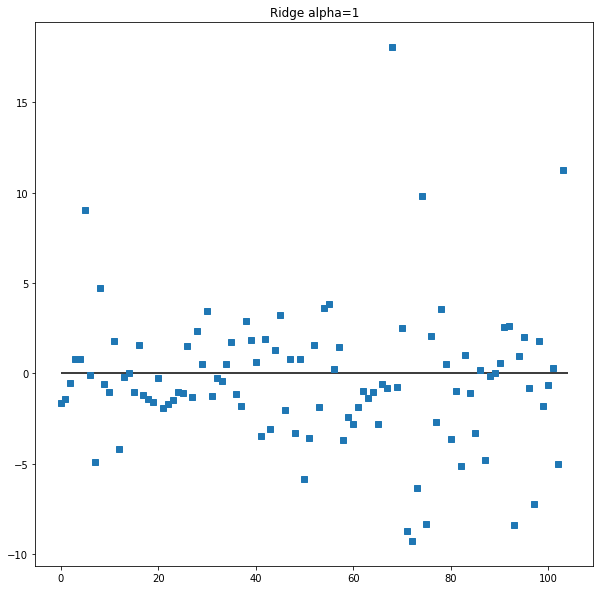

In [65]:
fig=plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.title('Ridge alpha=1')

Text(0.5, 1.0, 'Ridge alpha=0.01')

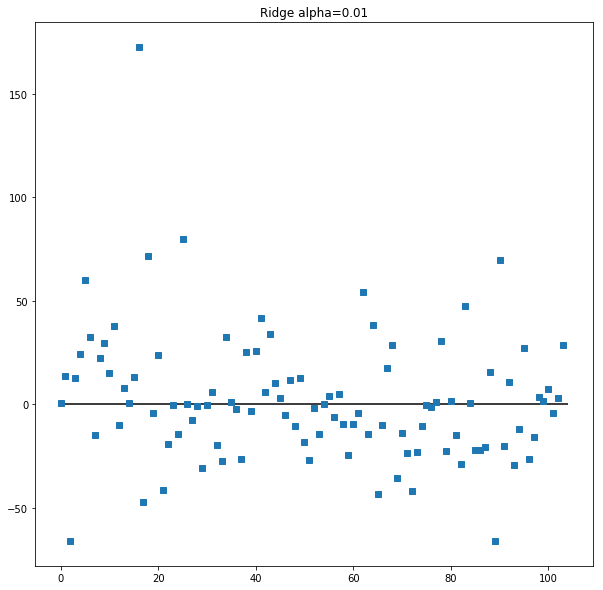

In [66]:
fig=plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_,'s',label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

Text(0.5, 1.0, 'Ridge alpha=1')

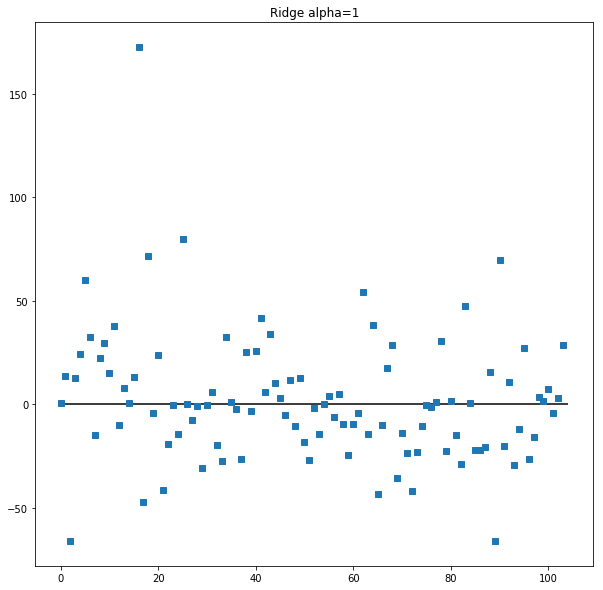

In [56]:
fig=plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_,'s',label="Ridge alpha=0.01")
plt.title('Ridge alpha=1')

In [0]:
from sklearn.linear_model import Lasso
import numpy as np

In [69]:
lasso=Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test)))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26


In [71]:
lasso00001=Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test,y_test)))

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81


In [72]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.80


In [73]:
lasso10=Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(lasso10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso10.score(X_test,y_test)))

훈련 세트 점수 : 0.00
테스트 세트 점수 : -0.03


Text(0.5, 1.0, 'Lasso alpha=1')

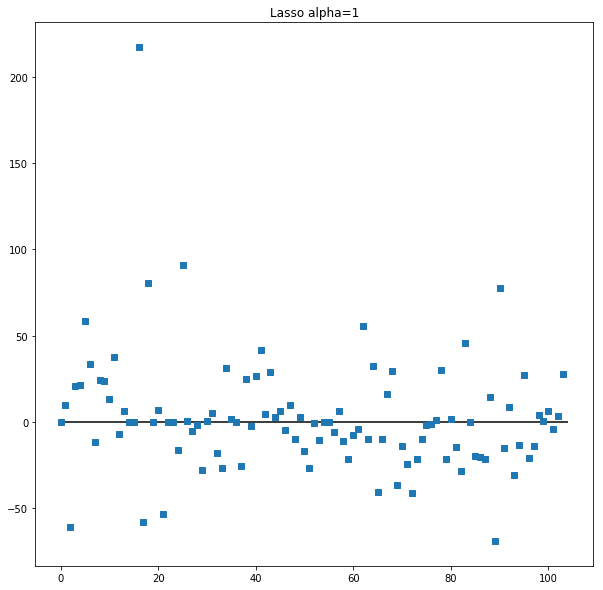

In [75]:
fig=plt.figure(figsize=(10,10))
plt.hlines(0,0, len(lasso00001.coef_))
plt.plot(lasso00001.coef_,'s',label="Lasso alpha=0.0001")
plt.title('Lasso alpha=1')